In [13]:
import numpy as np
import cv2

# Q2
Read `LineDetection.jpg` (the image below)




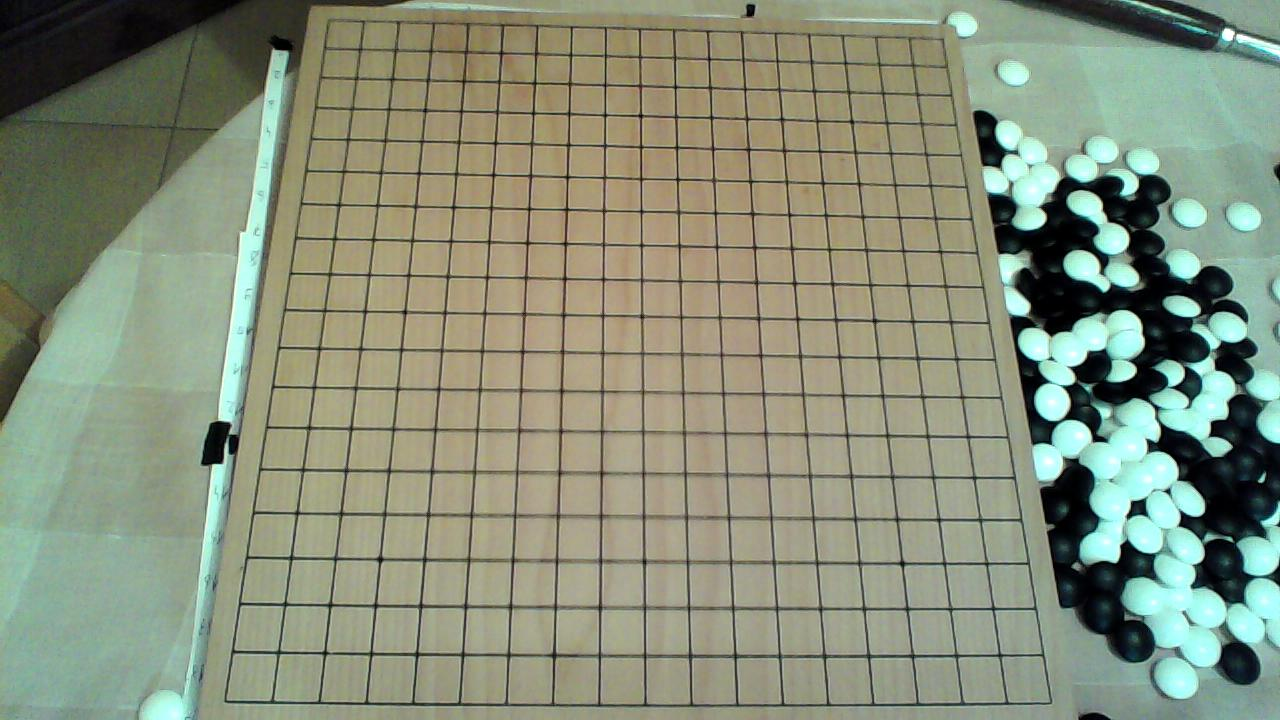

Use Hough to detect lines.

Note that you should consider the `Threshold`!

Here the threshold is `250`


In [49]:
img = cv2.imread('LineDetection.jpg', cv2.IMREAD_COLOR)
src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dst = cv2.Canny(src, 50, 200, None, 3)

cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

lines = cv2.HoughLines(dst, 1, np.pi / 180, 250, None, 0, 0)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(img, pt1, pt2, (0,0,255), 1, cv2.LINE_AA)

cv2.imshow('Output',img)
cv2.waitKey()

-1

Here is a sample output:

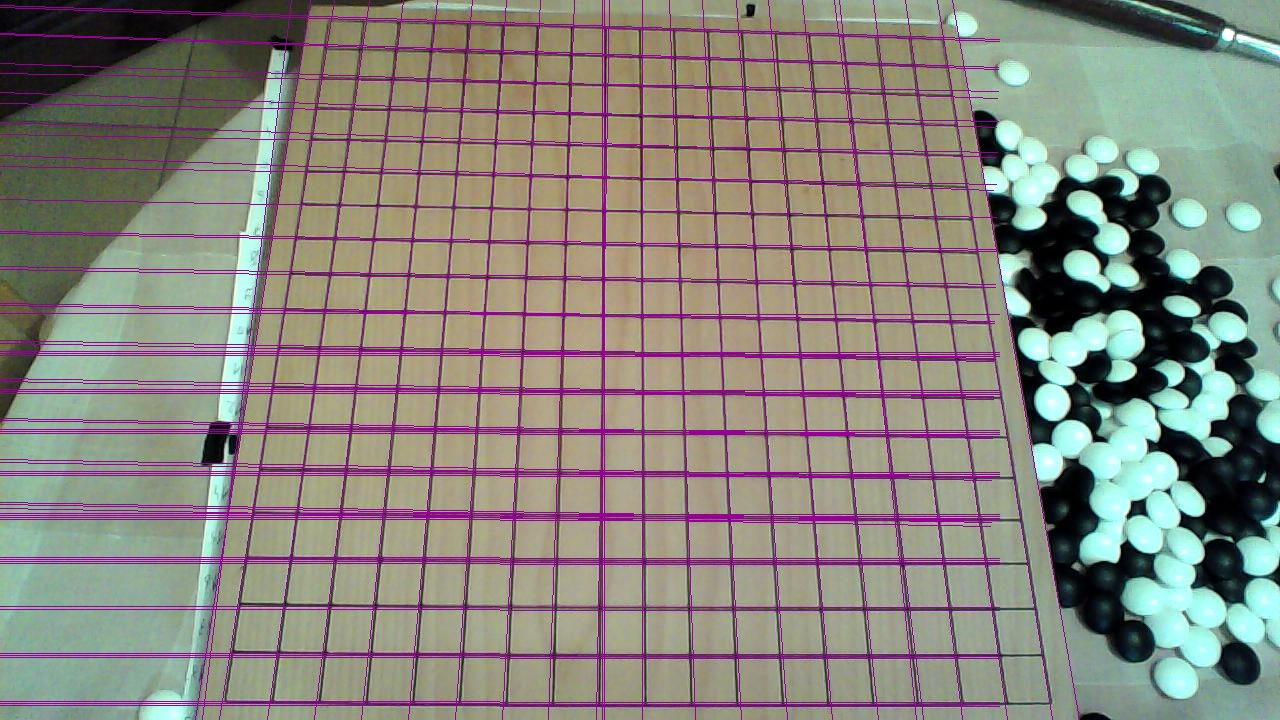

Now use *Probabilistic Hough Transform*. then, apply it to this picture.

In [ ]:
img = cv2.imread('LineDetection.jpg', cv2.IMREAD_COLOR)
src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dst = cv2.Canny(src, 50, 200, None, 3)

cdstP = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)

linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 130, None, 50, 10)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(img, (l[0], l[1]), (l[2], l[3]), (0,0,255), 1, cv2.LINE_AA)
cv2.imshow('Output',img)
cv2.waitKey()

Optimum amount of parameters: 
    
    threshold: 130

    minLineLength: 50

    maxLineGap: 10

Here is a sample output (Not the best one): 

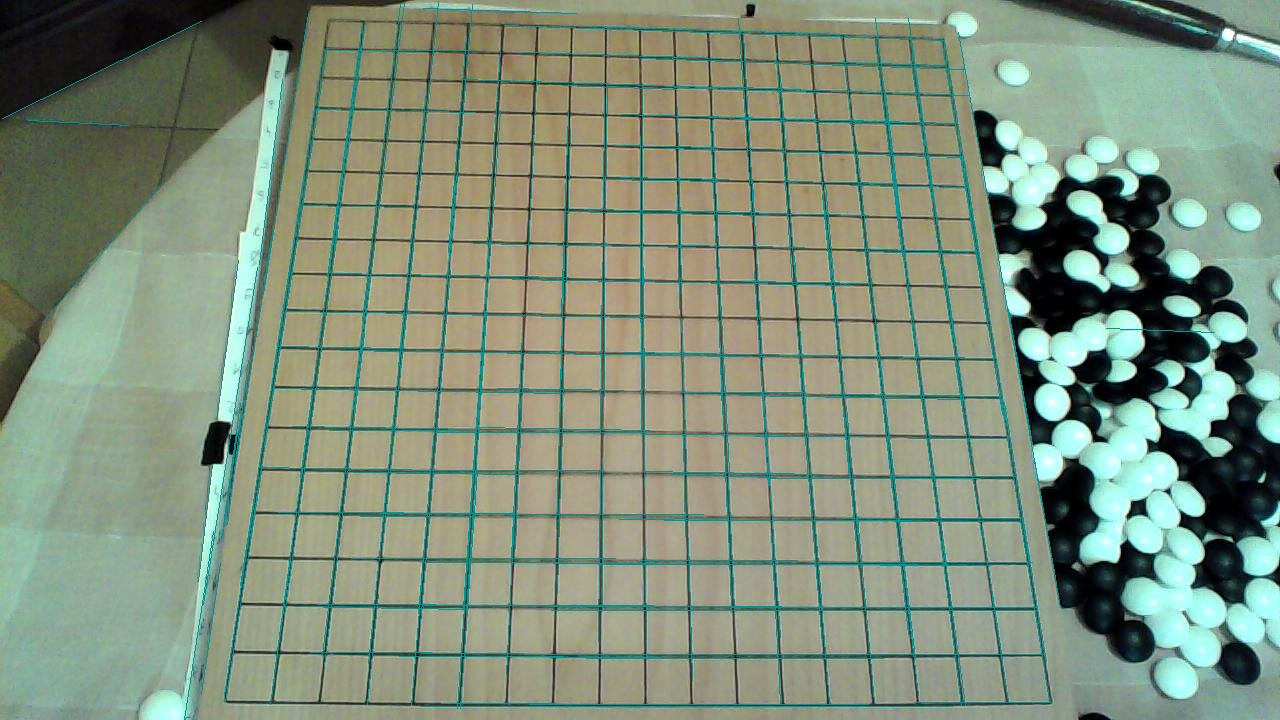

Note that you should find the optimum amount of parameters which are used in this algorithm.

# Q3

What does this cell of code do? Explain the algorithm.

Then Compare it with the results of the previous part.

In [ ]:
img = cv2.imread("LineDetection.jpg",0)
imgcolorous = cv2.imread('LineDetection.jpg')
UNKNOWN = cv2.createLineSegmentDetector(0)
lines = UNKNOWN.detect(img)[0]
drawn_img = UNKNOWN.drawSegments(imgcolorous,lines)
cv2.imwrite('UNKNOWN.jpg',drawn_img)

# Q4

In the cells below you should define two functions that one of them covert RGB to CMYK and another one Convert them vice versa. 

In [7]:
def rgb_to_cmyk(r, g, b, RGB_SCALE = 255, CMYK_SCALE = 100):

  if (r, g, b) == (0, 0, 0):
      return 0, 0, 0, CMYK_SCALE

  c = 1 - r / RGB_SCALE
  m = 1 - g / RGB_SCALE
  y = 1 - b / RGB_SCALE

  min_cmy = min(c, m, y)
  c = (c - min_cmy) / (1 - min_cmy)
  m = (m - min_cmy) / (1 - min_cmy)
  y = (y - min_cmy) / (1 - min_cmy)
  k = min_cmy

  return round(c * CMYK_SCALE), round(m * CMYK_SCALE), round(y * CMYK_SCALE), round(k * CMYK_SCALE)

In [8]:
rgb_to_cmyk(25, 56, 25)

(55, 0, 55, 78)

Expected Output: (55, 0, 55, 78)

In [11]:
def cmyk_to_rgb(c, m, y, k, CMYK_SCALE = 100, RGB_SCALE = 255):

  r = RGB_SCALE * (1.0 - c / float(CMYK_SCALE)) * (1.0 - k / float(CMYK_SCALE))
  g = RGB_SCALE * (1.0 - m / float(CMYK_SCALE)) * (1.0 - k / float(CMYK_SCALE))
  b = RGB_SCALE * (1.0 - y / float(CMYK_SCALE)) * (1.0 - k / float(CMYK_SCALE))

  return round(r), round(g), round(b)

In [12]:
cmyk_to_rgb(55, 0, 55, 78)

(25, 56, 25)

Expected Output: (25, 56, 25)

# Q5
Compute the HSI parametes and V, L and Y according to lectures.

In [27]:
def RGB_TO_HSI(arr):

    bgr = np.float32(arr)/255

    blue = bgr[0]
    green = bgr[1]
    red = bgr[2]

    def calc_intensity(red, blue, green):
        return np.divide(blue + green + red, 3)

    def calc_saturation(red, blue, green):
        minimum = np.minimum(np.minimum(red, green), blue)
        saturation = 1 - (3 / (red + green + blue + 0.001) * minimum)

        return saturation

    def calc_hue(red, blue, green):
        hue = np.copy(red)

        hue  = 0.5 * ((red - green) + (red - blue)) / \
                    np.sqrt((red - green)**2 +
                            ((red - blue ) * (green  - blue )))
        hue  = np.arccos(hue )

        if blue  <= green :
            hue  = hue 
        else:
            hue  = ((360 * np.pi) / 180.0) - hue 

        return hue

    hsi = cv2.merge((calc_hue(red, blue, green), calc_saturation(red, blue, green), calc_intensity(red, blue, green)))
    return hsi

def calc_V(arr):
    bgr = np.float32(arr)/255

    blue = bgr[0]
    green = bgr[1]
    red = bgr[2]
    v = np.maximum(np.maximum(red,blue),green)
    return v

def calc_L(arr):
    bgr = np.float32(arr)/255

    blue = bgr[0]
    green = bgr[1]
    red = bgr[2]
    l = (np.maximum(np.maximum(red,blue),green) + np.minimum(np.minimum(red, green), blue))/2
    return l 

def calc_Y(arr):
    bgr = np.float32(arr)/255

    blue = bgr[0]
    green = bgr[1]
    red = bgr[2]
    y = 0.299*red + 0.587*green + 0.114*blue
    return y
rgb = [150,65,200]
print(RGB_TO_HSI(rgb))
print(calc_V(rgb))
print(calc_L(rgb))
print(calc_Y(rgb))

[[[5.61100616 0.53040899 0.54248365]]

 [[0.         0.         0.        ]]

 [[0.         0.         0.        ]]

 [[0.         0.         0.        ]]]
0.78431374
0.5196078419685364
0.4511960936486721


# Good Luck!